In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.visualizers.deepHits_lrp_visualizer import DeepHiTSLRPVisualizer
from modules.data_set_generic import Dataset
from parameters import param_keys, general_keys

/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rcarrasco/anaconda3/envs/early/lib

In [2]:
# instance model and load weights

# data_path = os.path.join("../../pickles", 'training_set_with_bogus.pkl')
data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: 1,
}

model = DeepHiTSEntropyRegModel(params)
checkpoint_path = os.path.join(
    PROJECT_PATH,
    "results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_1_20191202-165430/checkpoints",
    "model",
)
model.load_model(checkpoint_path)

lrp_visualizer = DeepHiTSLRPVisualizer(model)


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use `tf.cast` instead.








Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_1_20191202-165430/checkpoints/model
Forward Pass ... 
------------------------------------------------- 
input:: [None, 27, 27, 3]
conv2d_1:: [None, 24, 24, 32]
conv2d_2:: [None, 24, 24, 32]

maxpool_3:: [None, 12, 12, 32]
conv2d_4:: [None, 12, 12, 64]
conv2d_5:: [None, 12, 12, 64]
conv2d_6:: [None, 12, 12, 64]
maxpool_7:: [None, 6, 6, 64]
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
linear_8:: [None, 64]
linear_9:: [None, 64]

avgpool_10:: [None, 64]
linear_11:: [None, 5]
softmax:: [None, 5]

------------------------------------------------- 
Computing LRP ... 
------------------------------------------------- 
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
linear_11:: [None, 6

In [3]:
# load data
train_set, val_set, test_set = model._data_init()
# evaluate set
model.evaluate(test_set.data_array, test_set.data_label)

Label count AGN: 9996 -SN: 1079 -VS: 9938 -asteroid: 9899 -bogus: 5350 -
467 misshaped samples removed
Label count AGN: 9844 -SN: 1067 -VS: 9766 -asteroid: 9797 -bogus: 5321 -
4427 samples with NaNs. NaNs replaced with number 0

Test Metrics: loss -0.432215, accuracy 0.900000


{'accuracy': 0.9, 'loss': -0.43221483}

In [4]:
def get_classification_indexes(model: DeepHiTSNanNormCropStampModel, dataset: Dataset):
    predictions = model.predict(dataset.data_array)
    correct_idxs = np.where(predictions == dataset.data_label)[0]
    incorrect_idxs = np.where(predictions != dataset.data_label)[0]
    return correct_idxs, incorrect_idxs


test_correct_idxs, test_incorrect_idxs = get_classification_indexes(model, test_set)
np.random.seed(0)
np.random.shuffle(test_correct_idxs)

In [5]:
# INCORRECT TEST
print("INCORRECT TEST")
incorrect_samples = lrp_visualizer.plot_relevances(
    test_set.data_array[test_incorrect_idxs],
    test_set.data_label[test_incorrect_idxs],
    return_arrays=True,
    do_plot=False,
)

INCORRECT TEST


In [6]:
incorrect_samples[0].keys()

dict_keys(['predicted', 'real_label', 'input_image', 'normalized_relevances'])

In [7]:
print(incorrect_samples[0]["predicted"])
print(incorrect_samples[0]["real_label"])
print(incorrect_samples[0]["input_image"].shape)
print(incorrect_samples[0]["normalized_relevances"].shape)

[[0.22457401 0.01942419 0.66124517 0.05070593 0.04405073]]
0
(21, 21, 3)
(21, 21, 3)


In [8]:
def plot_relevance(
    pred_proba, label, images, relevances, save_path=None, normalize=True, fontsize=28
):
    f, ax = plt.subplots(2, 3, figsize=(15, 10))
    class_names = ["AGN", "Supernovae", "VS", "Asteroids", "Bogus"]
    image_title = ["Science", "Template", "Difference"]
    mess = "Predicted class: " + class_names[np.argmax(pred_proba[0, ...])] + ", "
    mess += "Label: " + class_names[label] + "\n"
    for i in range(3):
        if normalize:
            ax[0, i].imshow(
                (
                    images[..., i]
                    - np.nanmean(images[..., i]) / np.nanstd(images[..., i])
                ),
                cmap="inferno",
            )
            # vmin=-1, vmax=1)
        else:
            ax[0, i].imshow(images[..., i])
        ax[1, i].imshow(relevances[..., i], vmax=0.8, vmin=0.2, cmap="jet")
        if i == 1:
            ax[0, i].set_title(mess + image_title[i], fontsize=fontsize)
        else:
            ax[0, i].set_title(image_title[i], fontsize=fontsize)
        ax[0, i].axis("off")
        ax[1, i].axis("off")

    plt.subplots_adjust(wspace=0.001, hspace=0.05)
    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

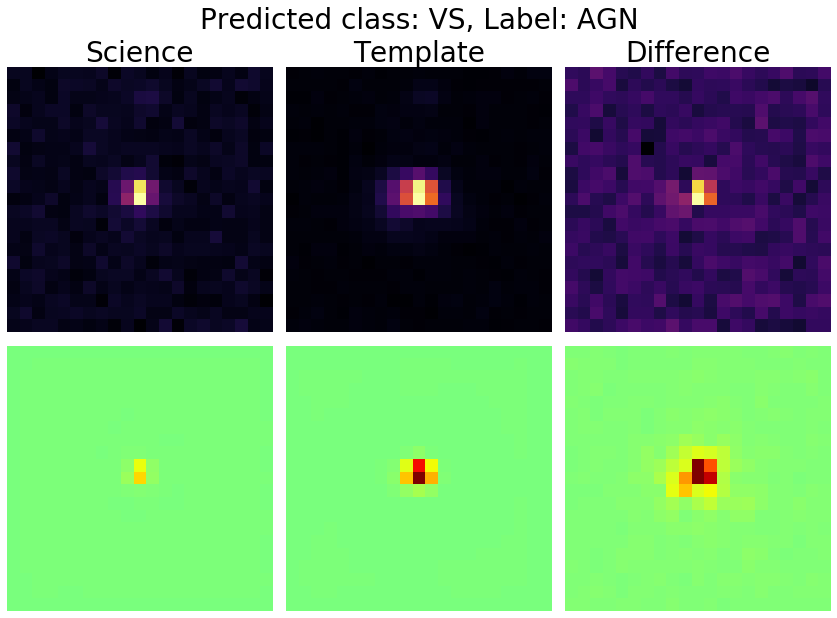

0.49848688 1.0


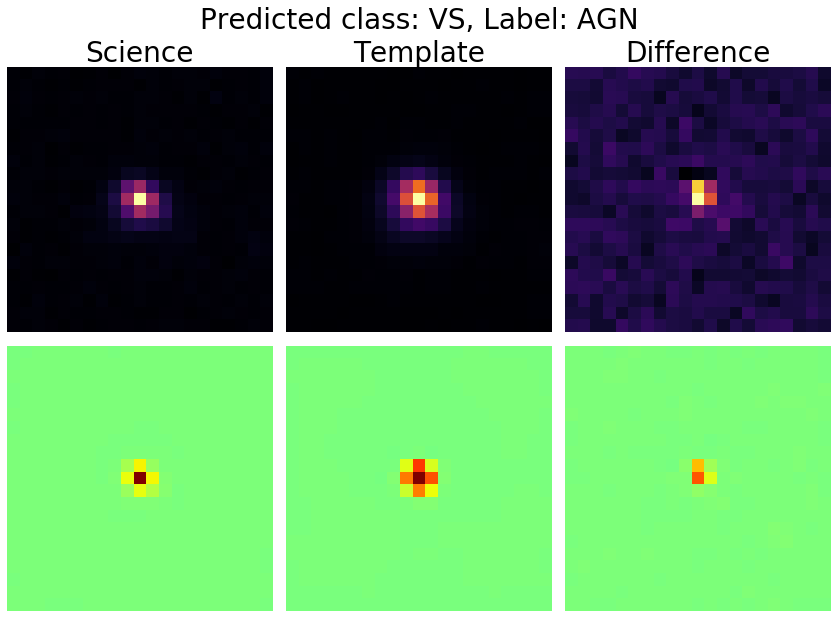

0.49626887 1.0


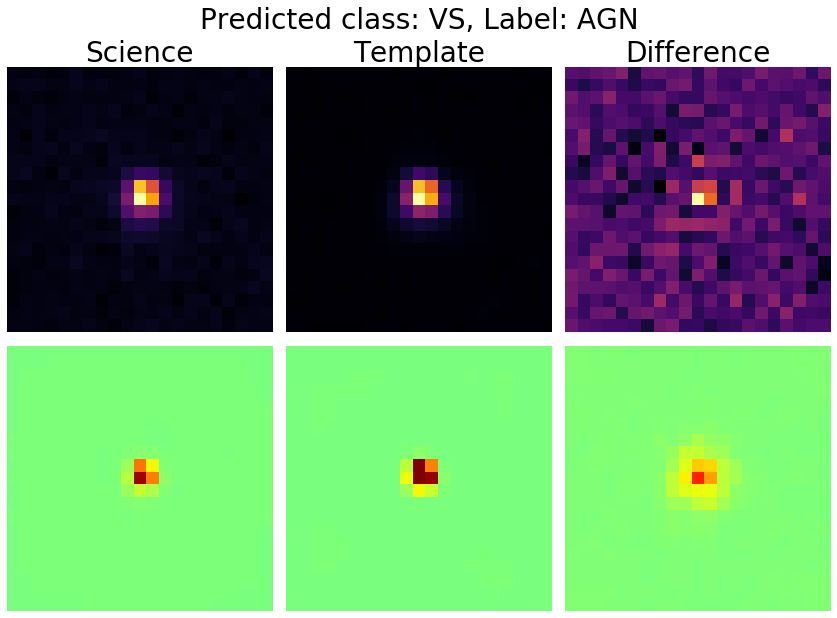

0.49835747 1.0


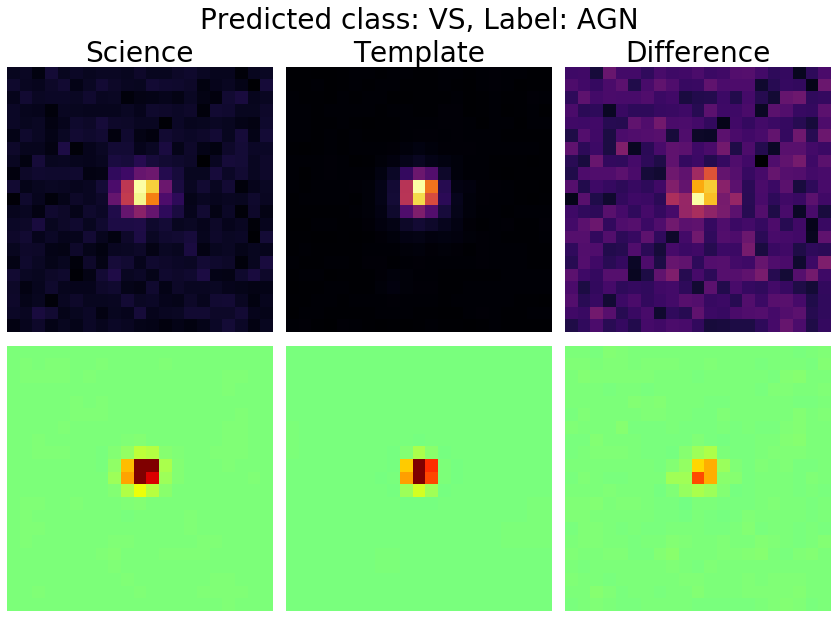

0.49522674 1.0


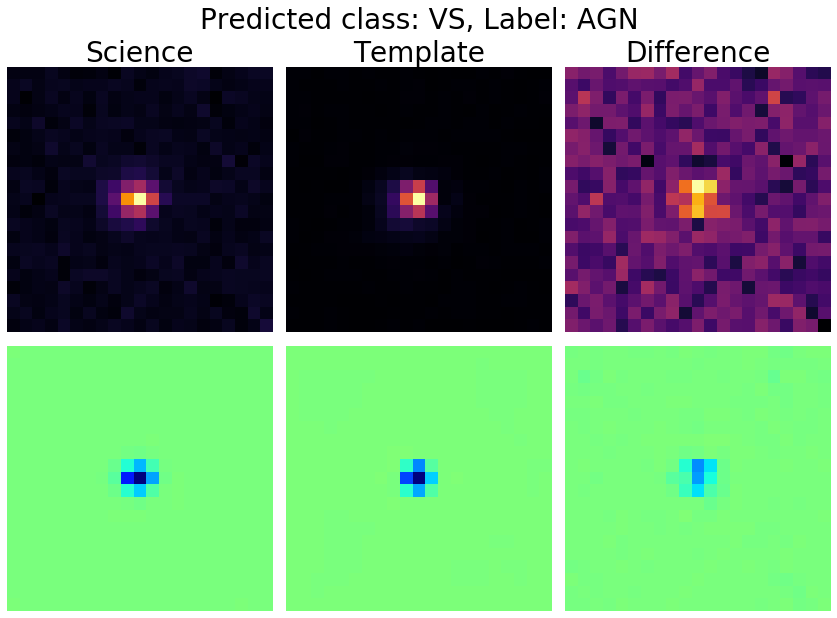

0.0 0.5037857


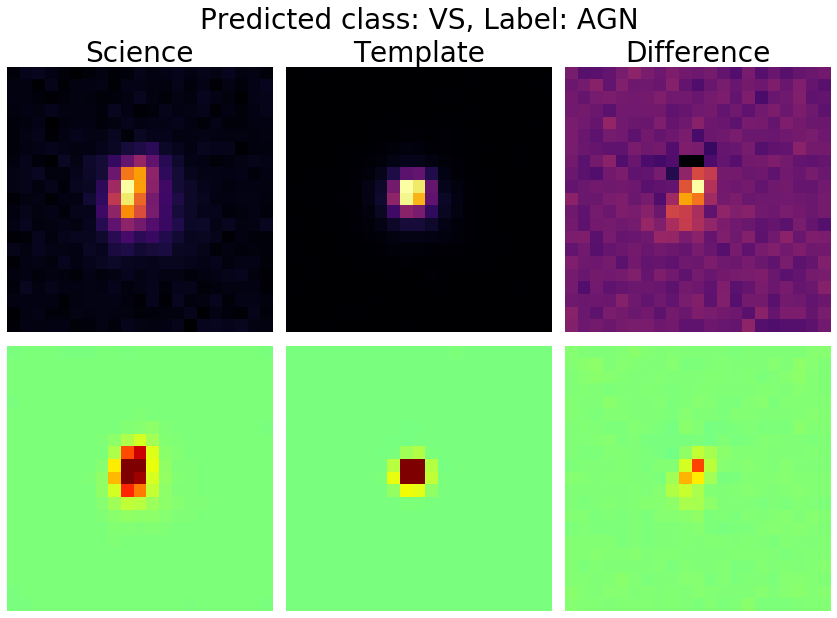

0.49385786 1.0


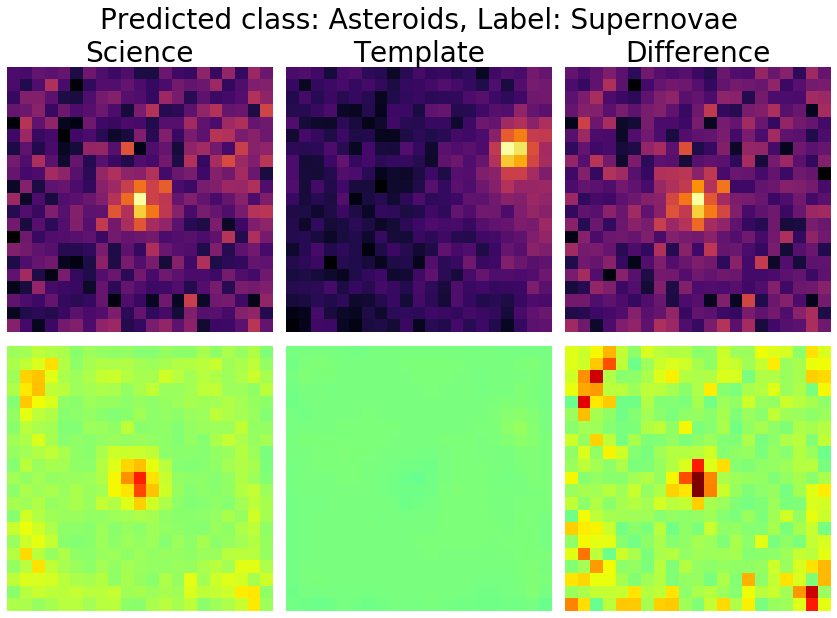

0.48513517 1.0


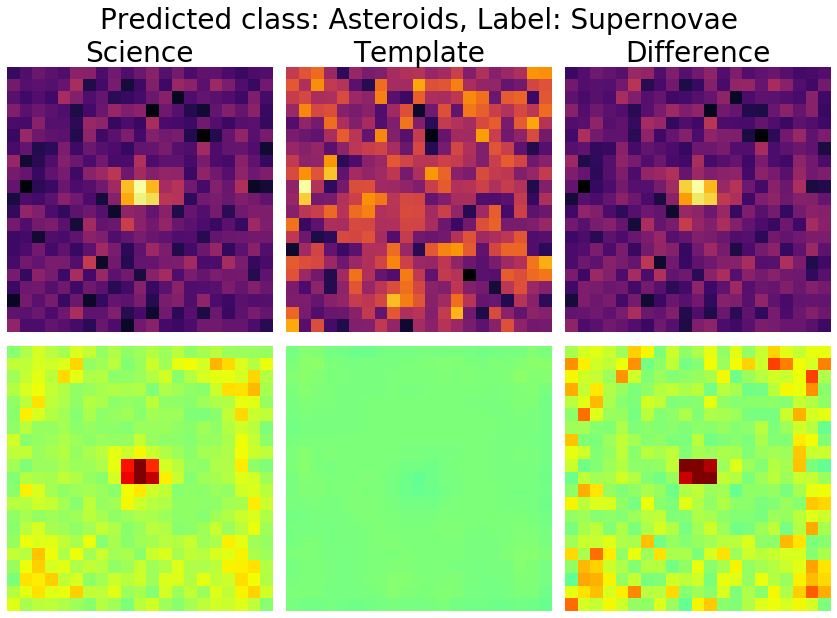

0.47984475 1.0


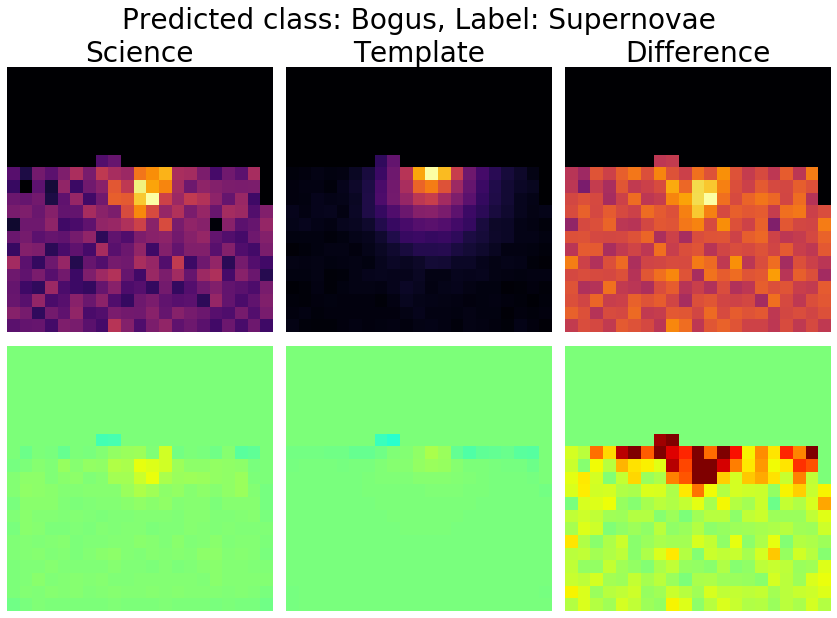

0.44002113 1.0


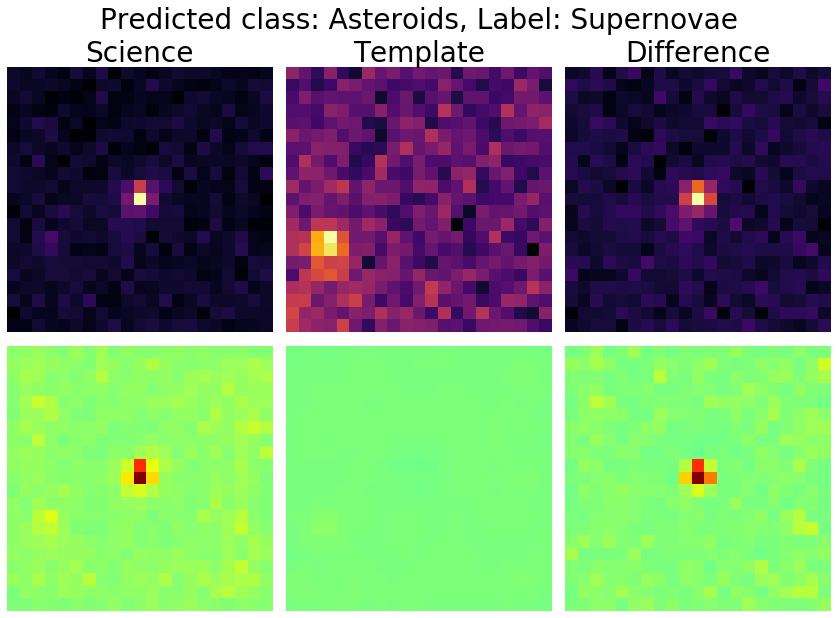

0.49004486 1.0


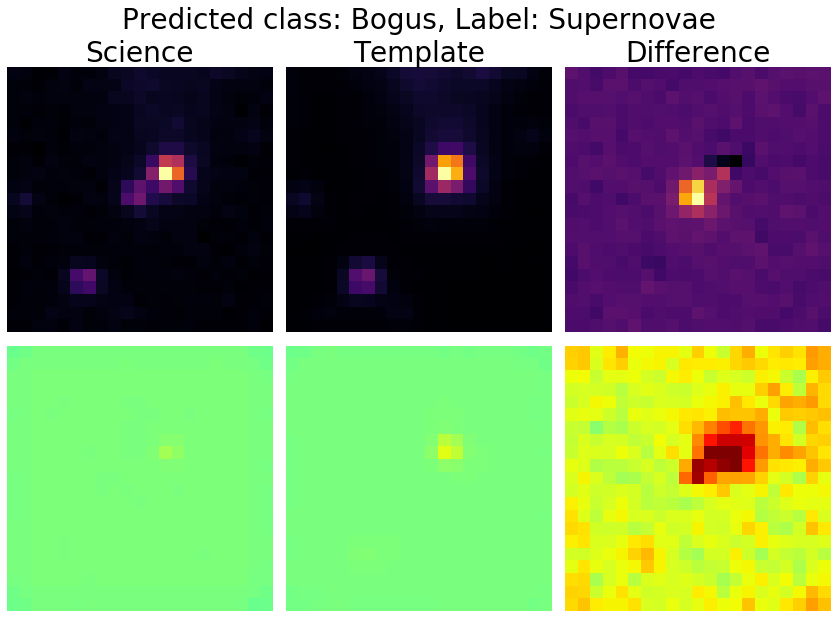

0.4873081 1.0


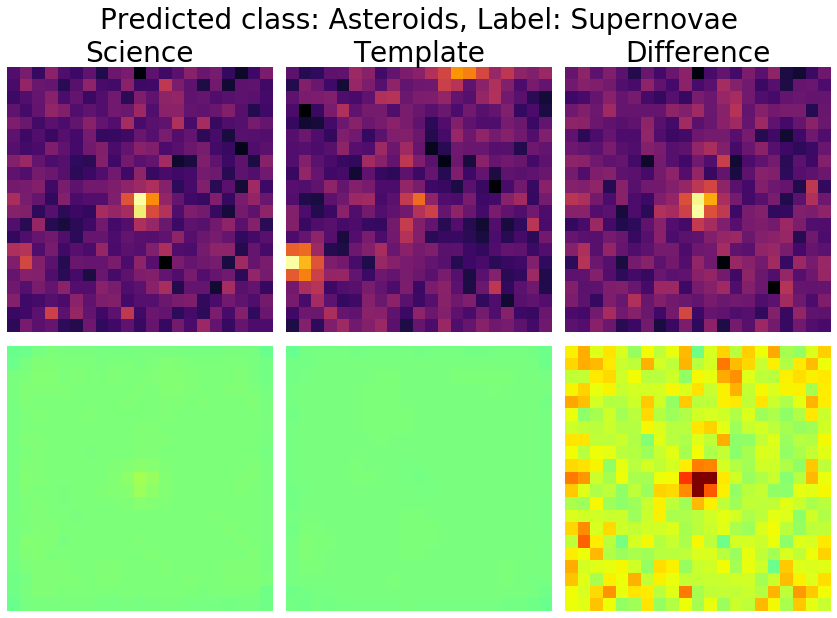

0.48468956 1.0


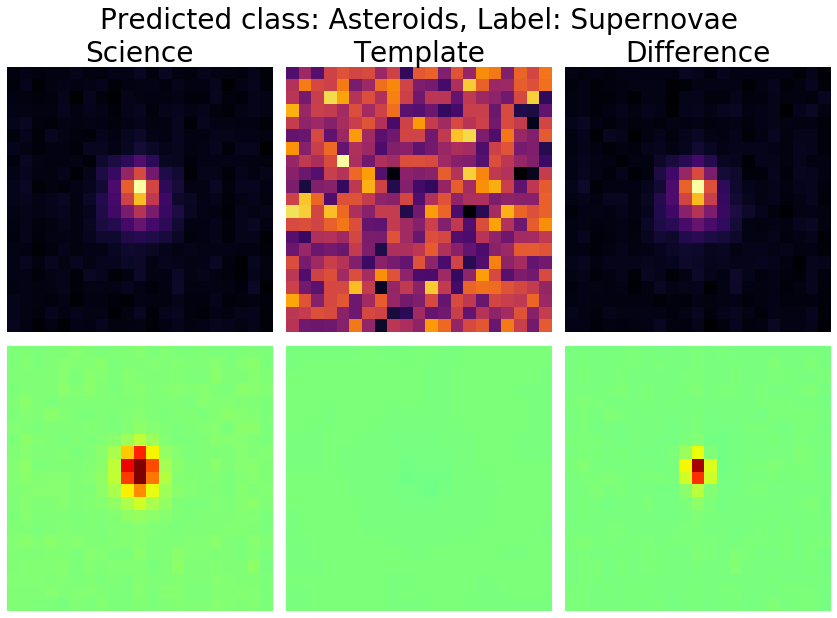

0.4920278 1.0


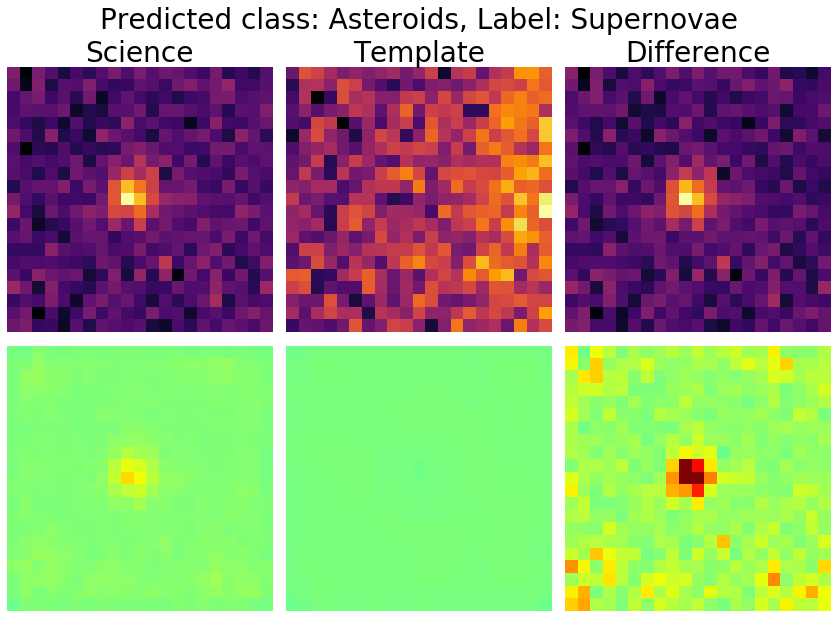

0.48622793 1.0


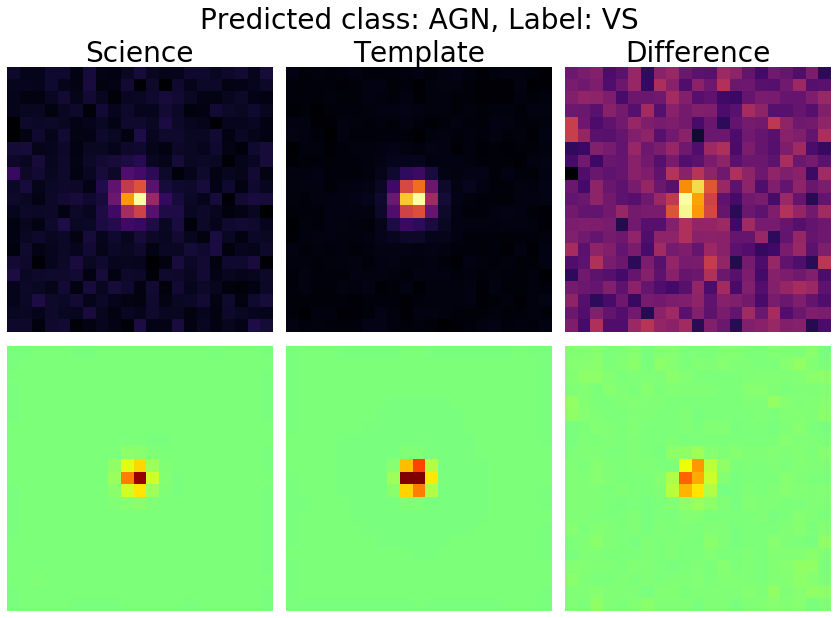

0.49720833 1.0


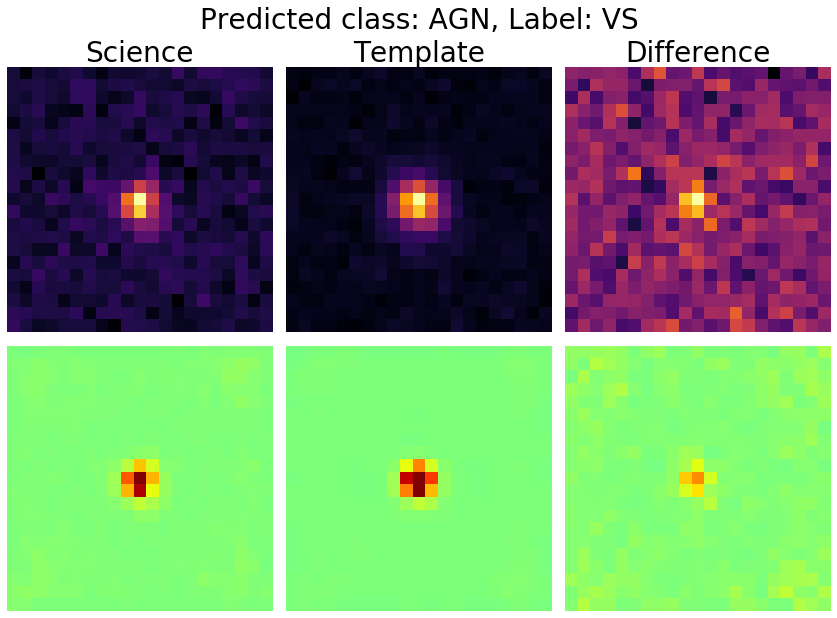

0.49590883 1.0


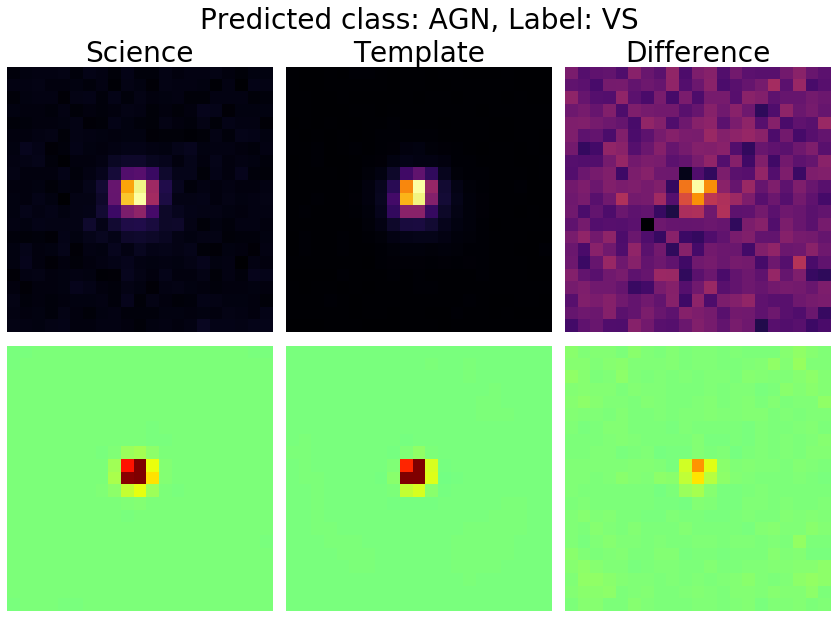

0.49462137 1.0


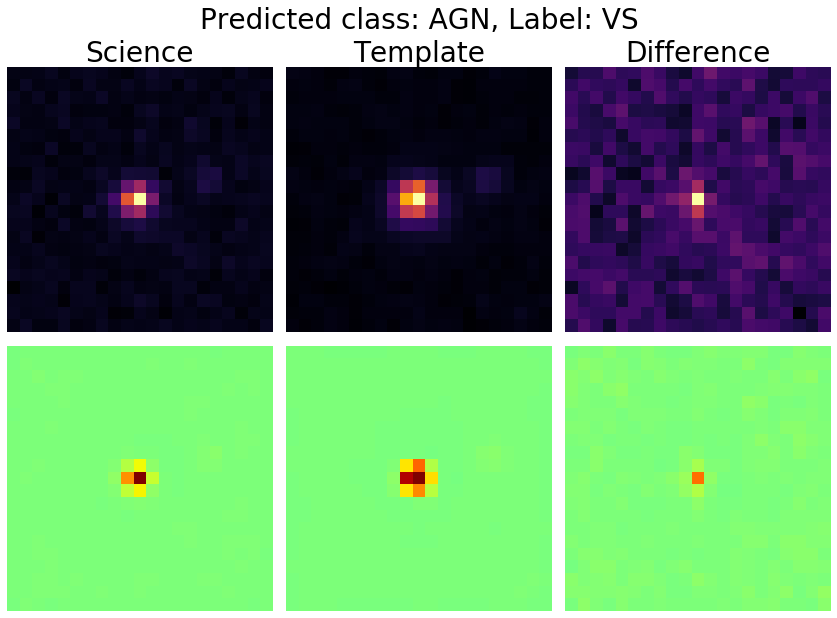

0.4956621 1.0


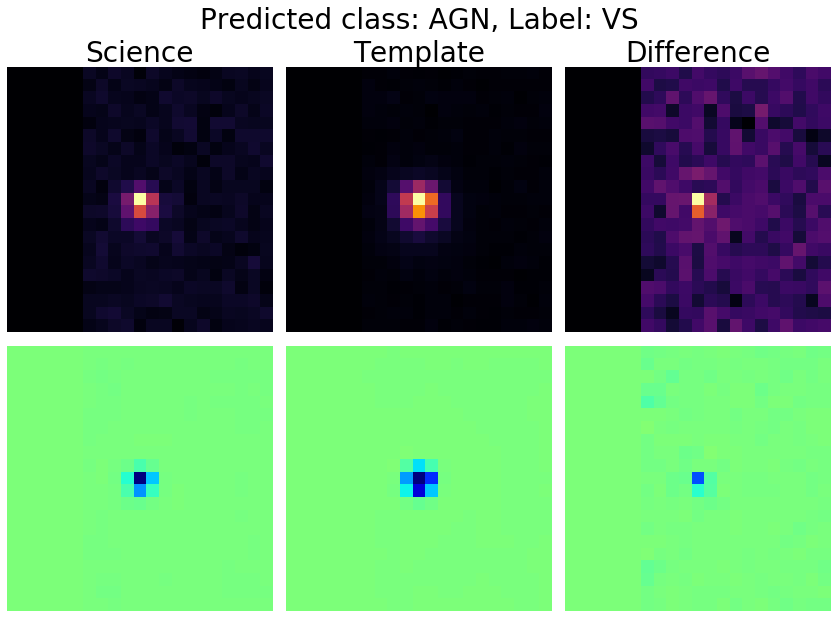

0.0 0.5058466


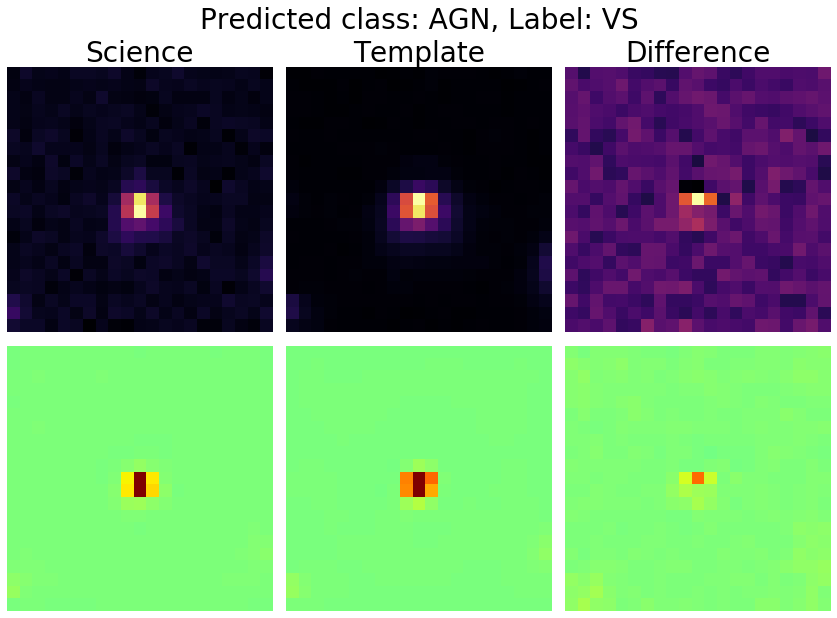

0.49419644 1.0


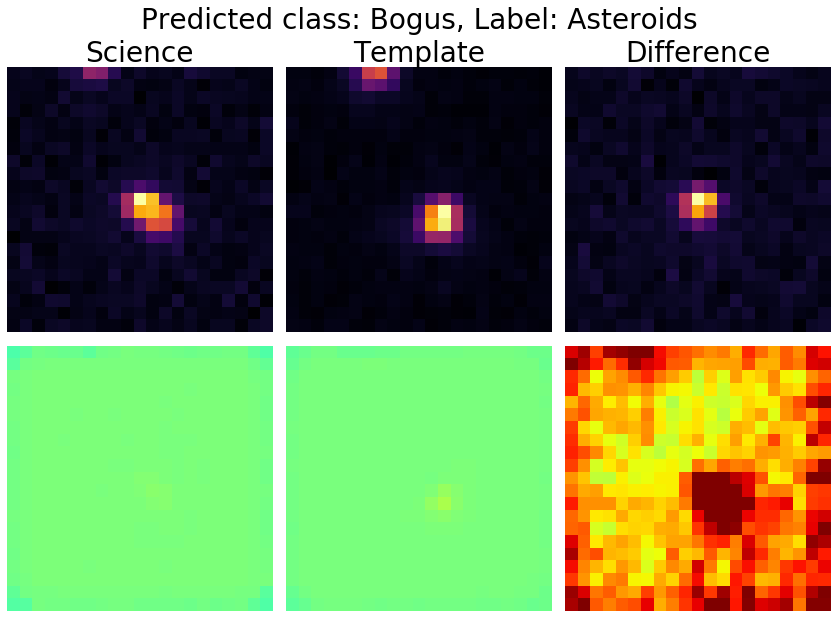

0.4669651 1.0


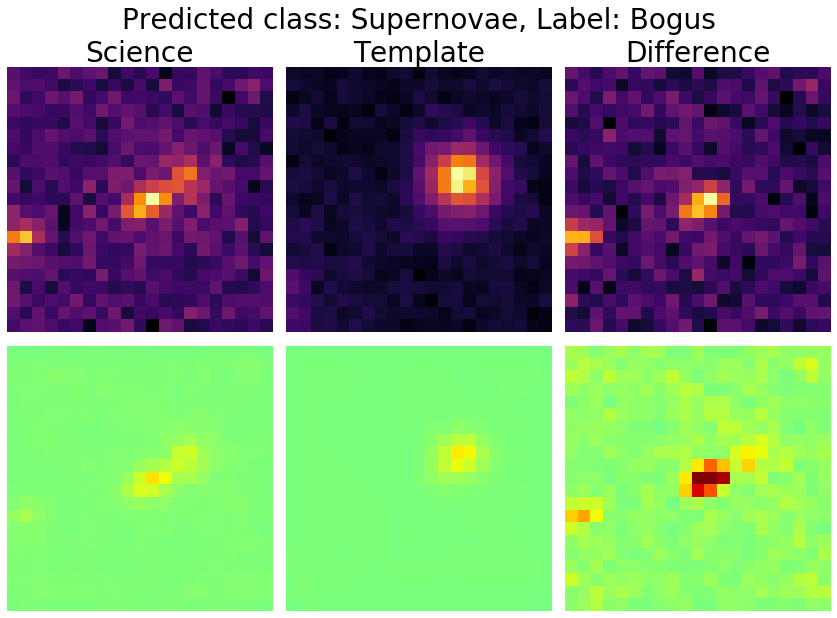

0.49582103 1.0


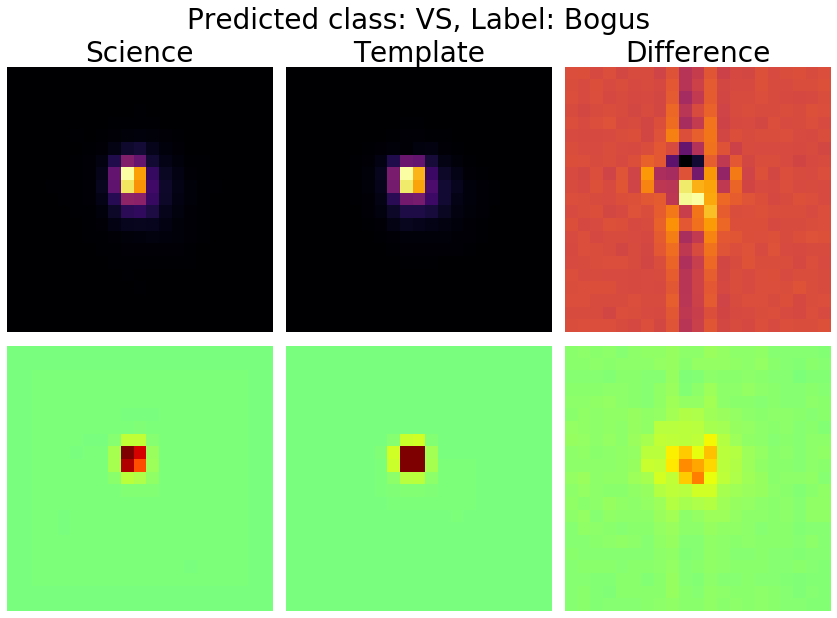

0.49865285 1.0


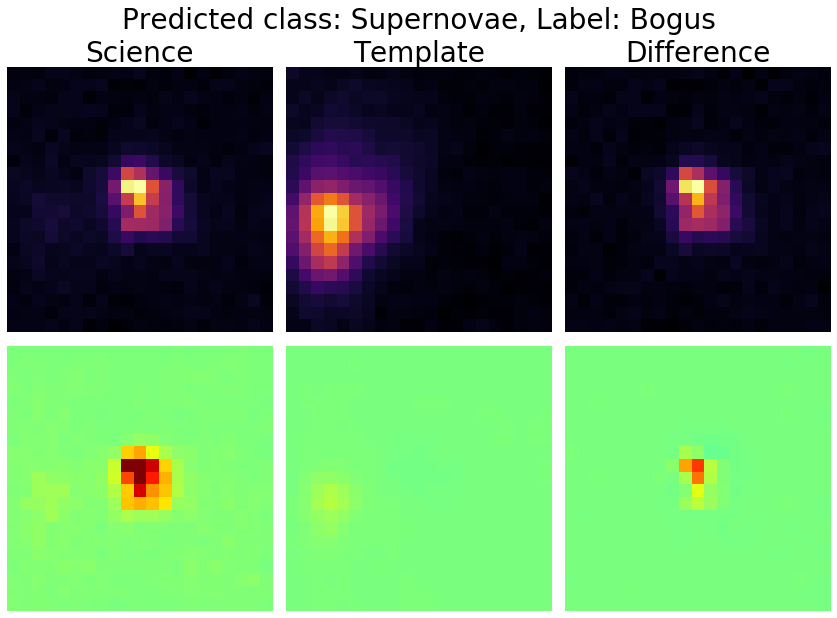

0.48436674 1.0


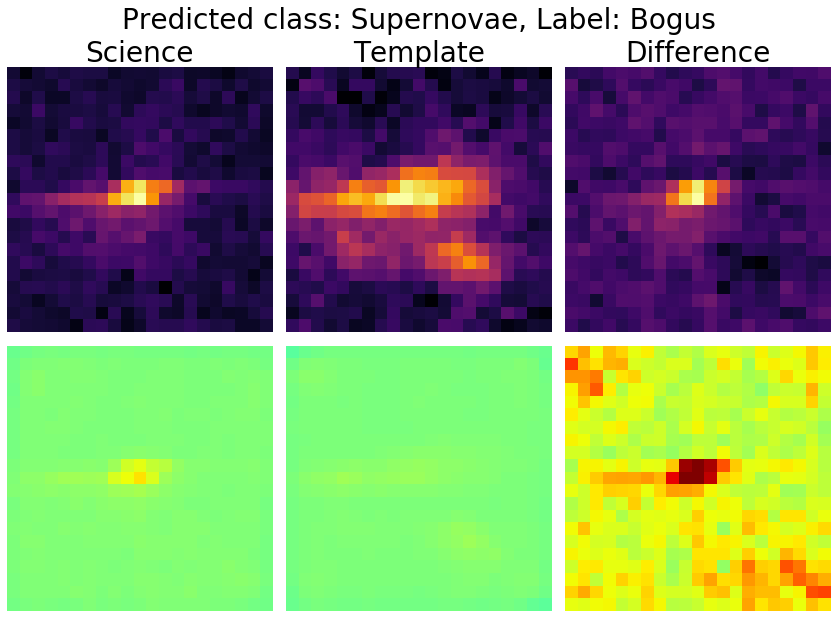

0.47543293 1.0


In [9]:
for i in range(25):
    pred_prob = incorrect_samples[i]["predicted"]
    label = incorrect_samples[i]["real_label"]
    images = incorrect_samples[i]["input_image"]
    relevances = incorrect_samples[i]["normalized_relevances"]
    plot_relevance(
        pred_prob,
        label,
        images,
        relevances,
        save_path="plots/lrp_plots/incorrect_sample_" + str(i) + ".png",
    )
    print(np.amin(relevances), np.amax(relevances))

In [10]:
print("CORRECT TEST")
correct_samples = lrp_visualizer.plot_relevances(
    test_set.data_array[test_correct_idxs],
    test_set.data_label[test_correct_idxs],
    return_arrays=True,
    do_plot=False,
)

CORRECT TEST


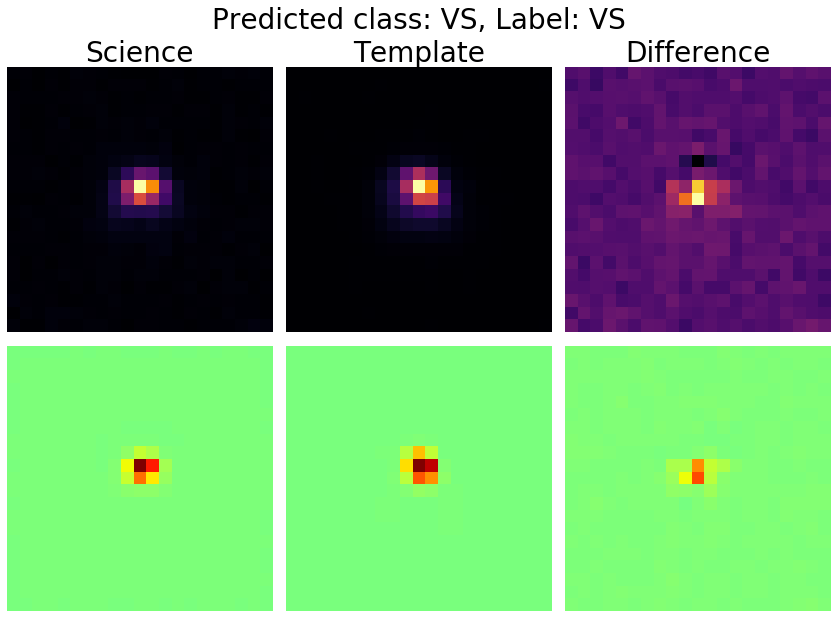

0.49760357 1.0


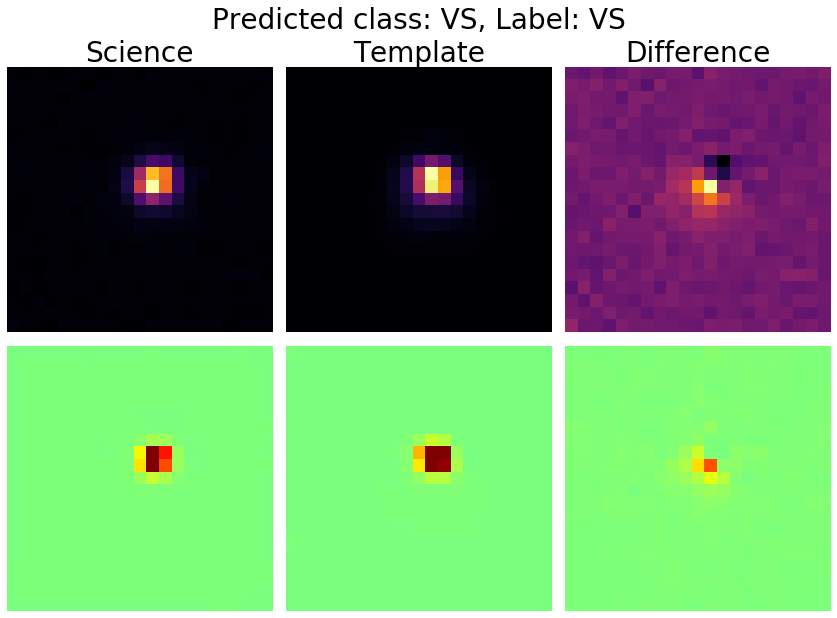

0.49716046 1.0


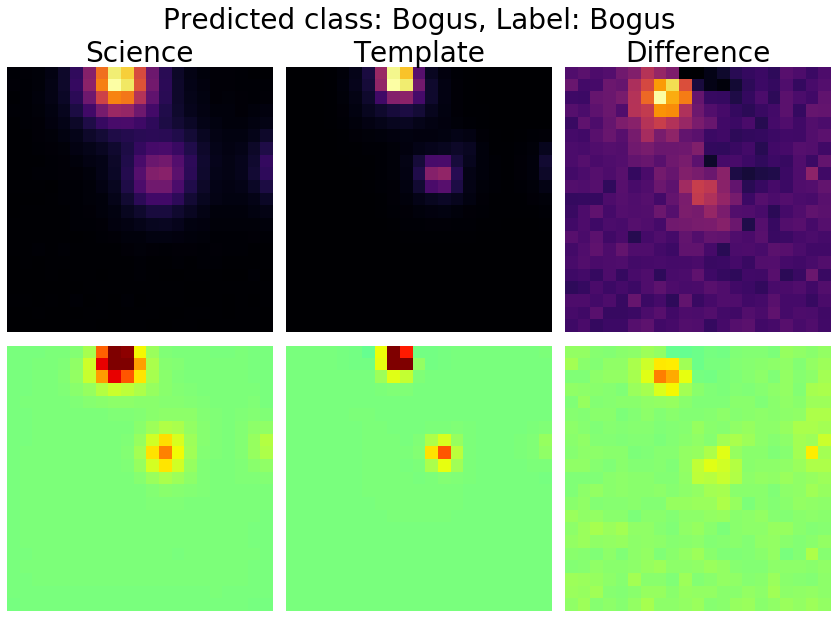

0.48397976 1.0


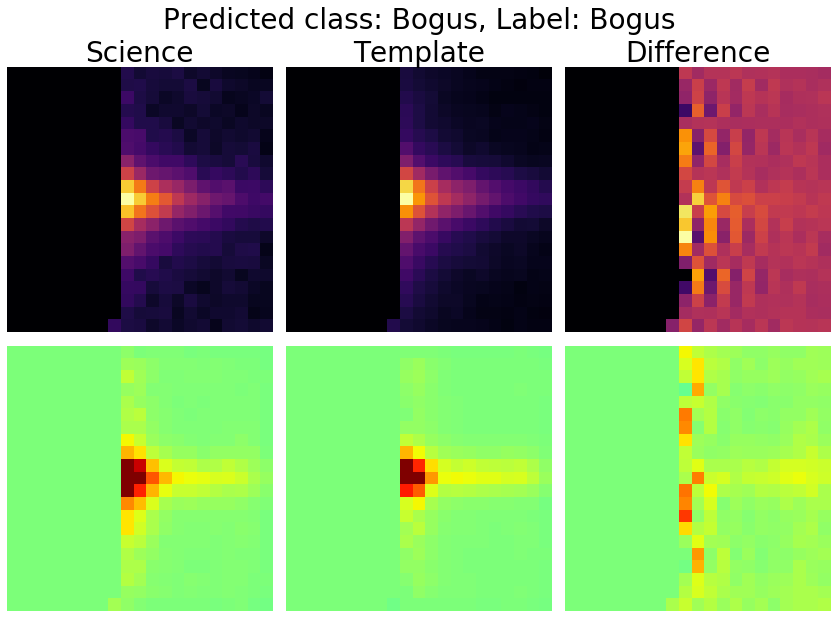

0.48399454 1.0


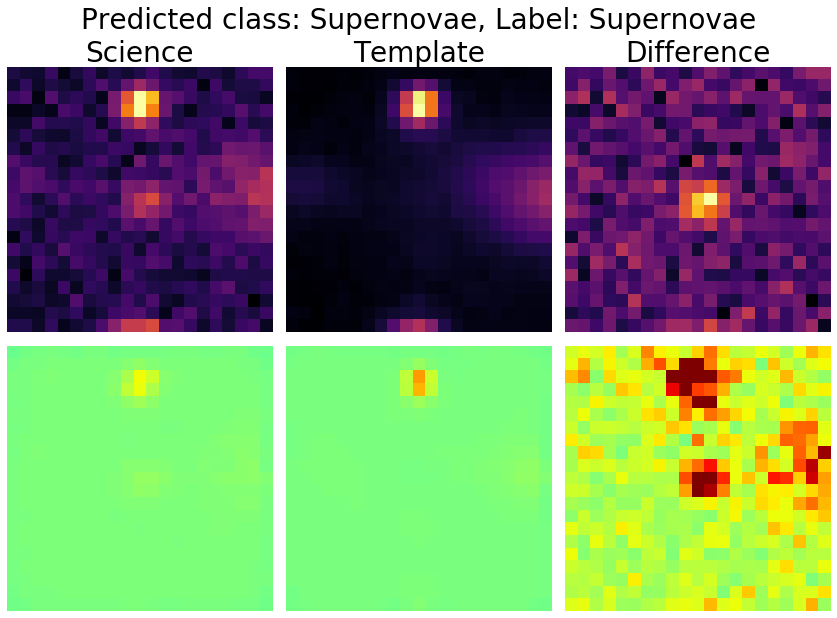

0.4871398 1.0


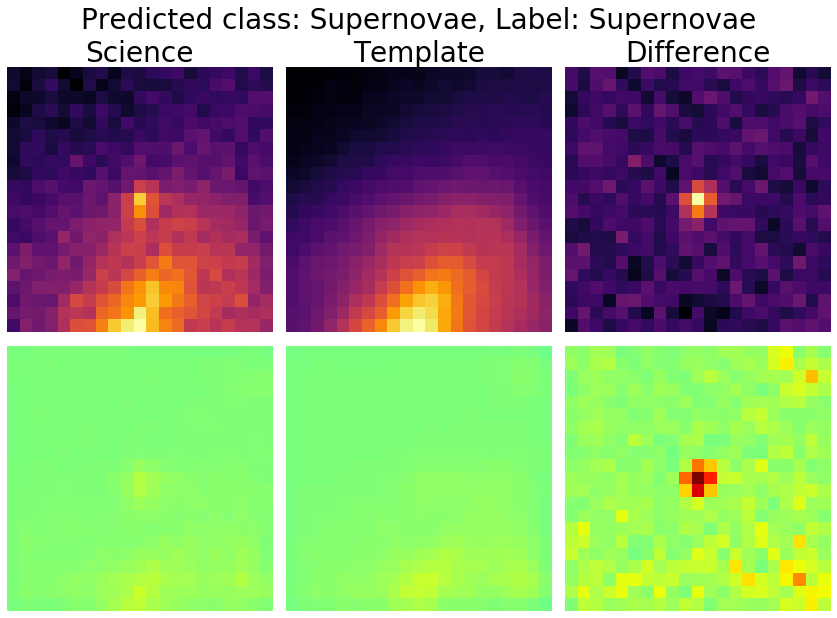

0.48871467 1.0


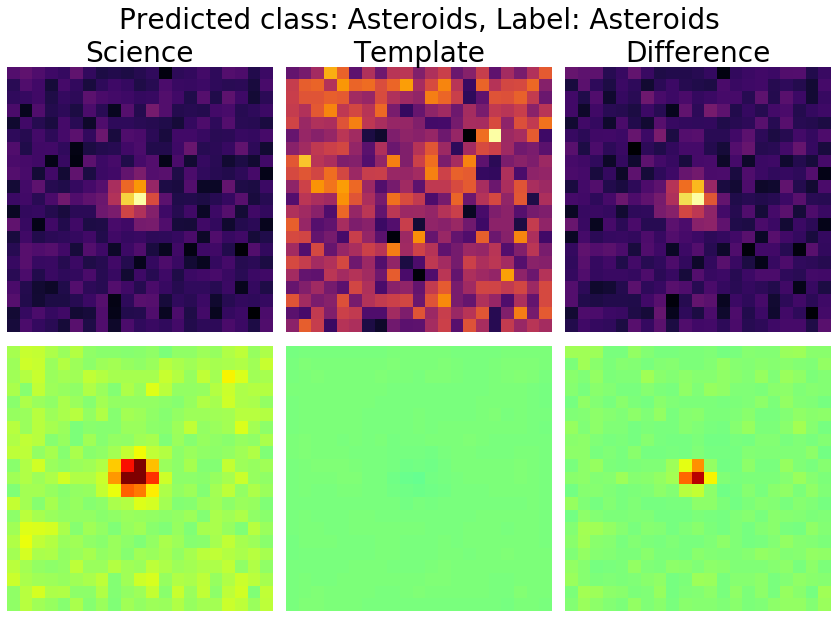

0.48555654 1.0


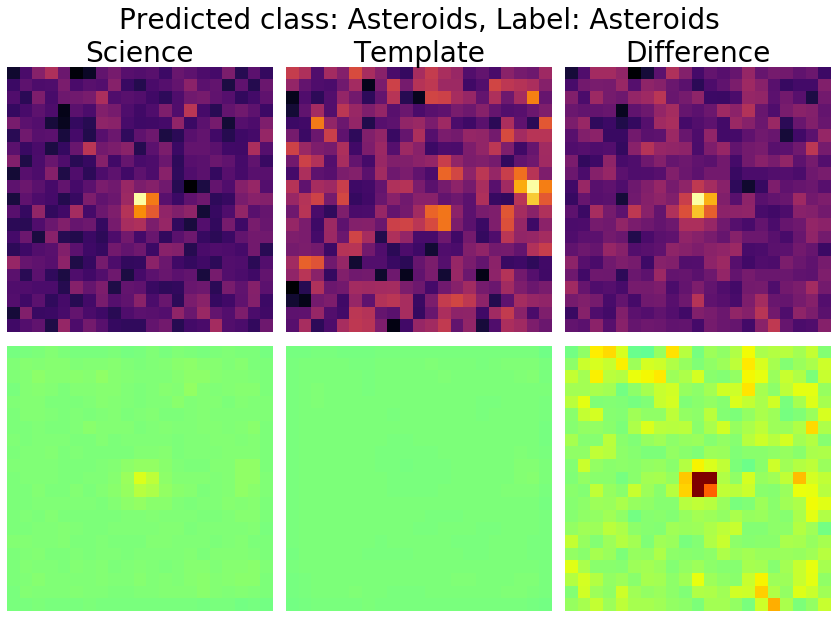

0.48140743 1.0


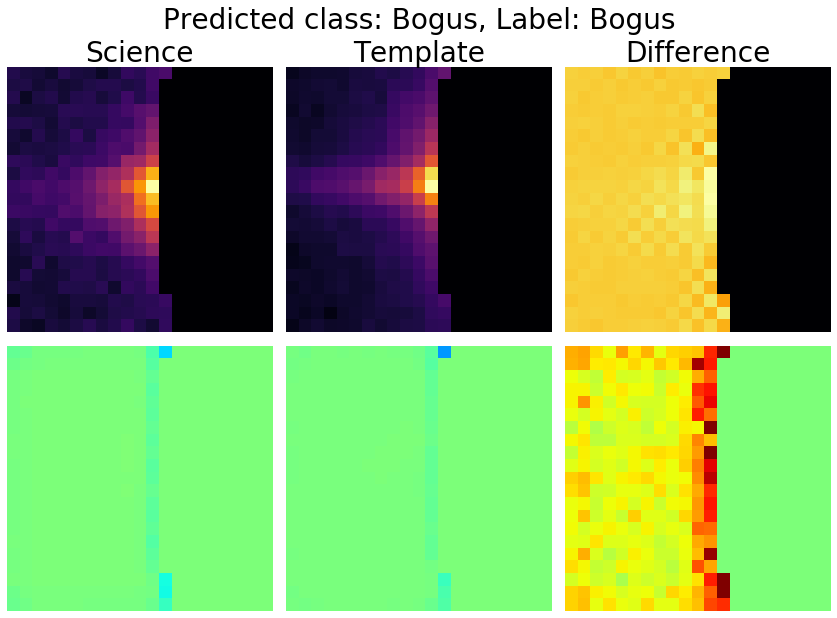

0.36455175 1.0


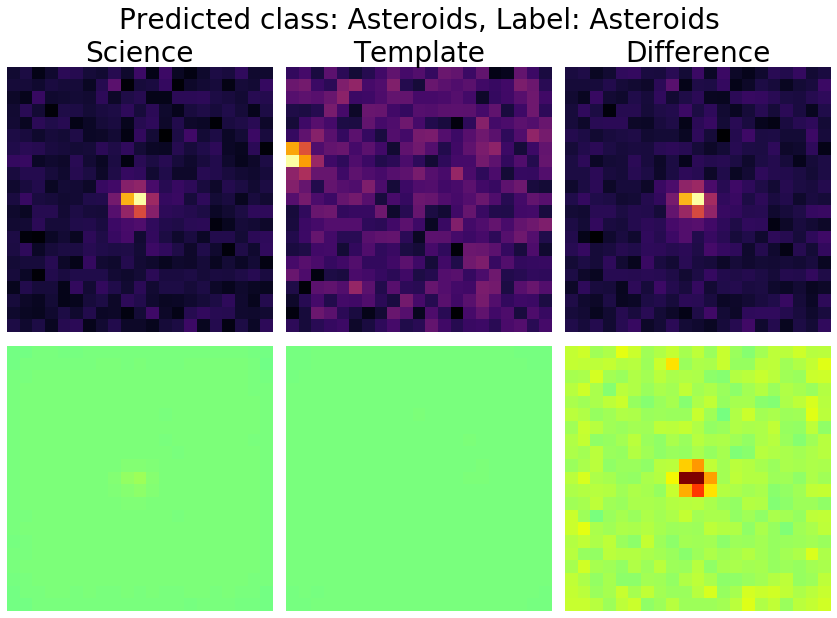

0.49295557 1.0


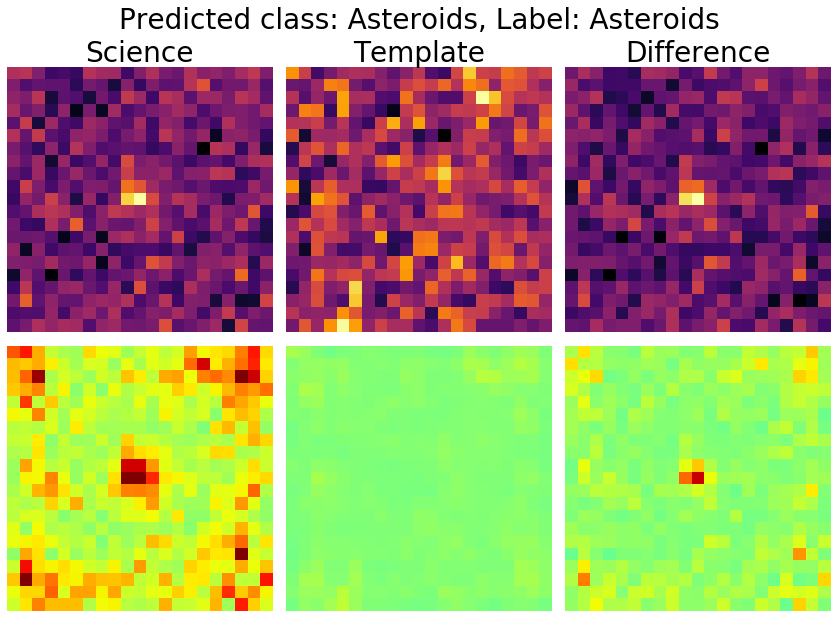

0.48801723 1.0


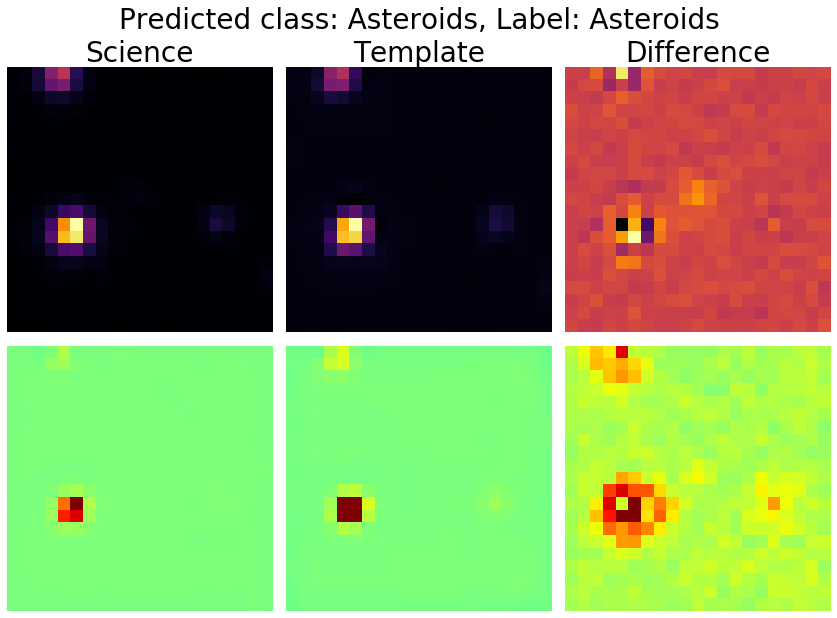

0.49032298 1.0


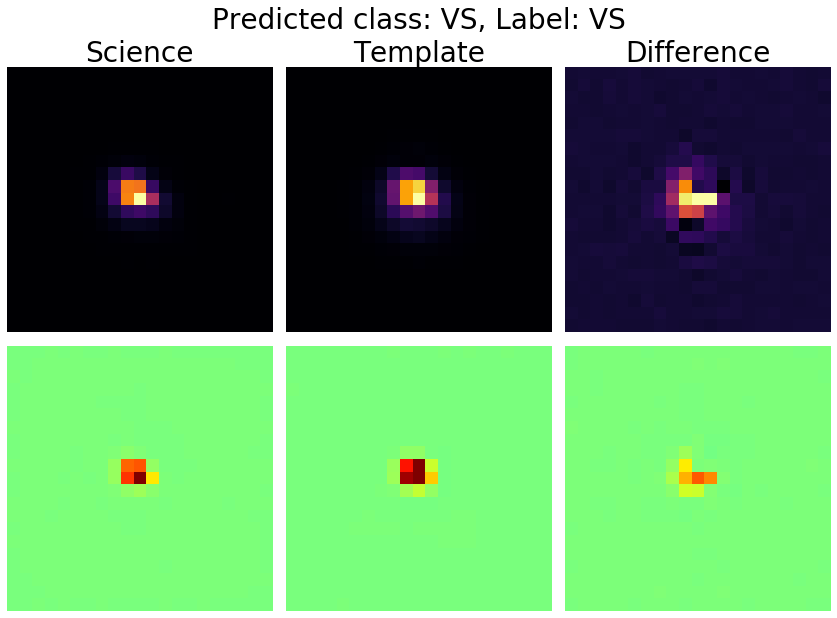

0.4947174 1.0


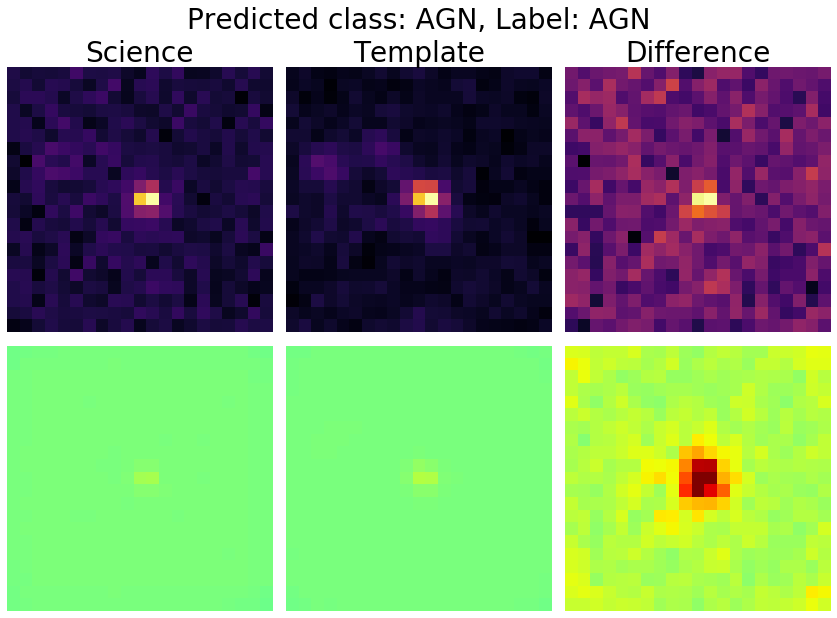

0.4895049 1.0


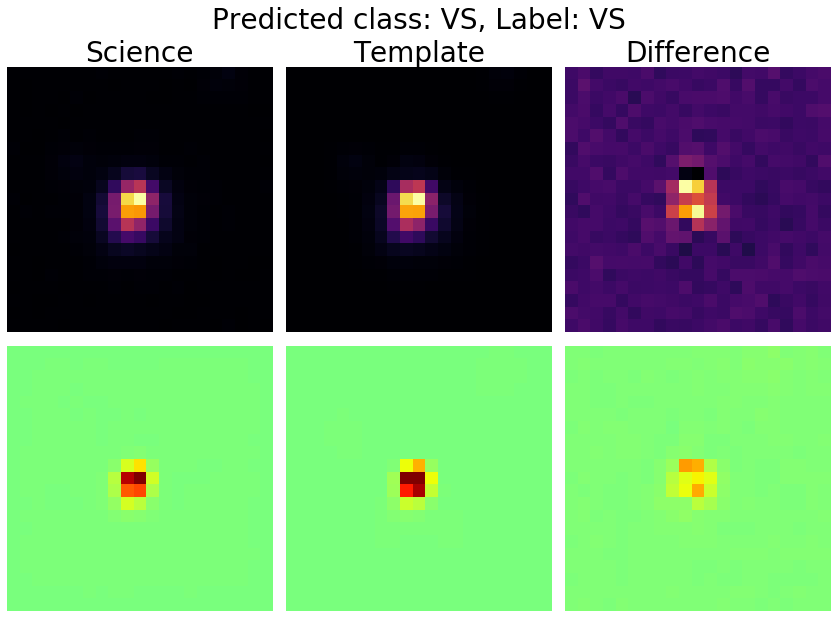

0.4982561 1.0


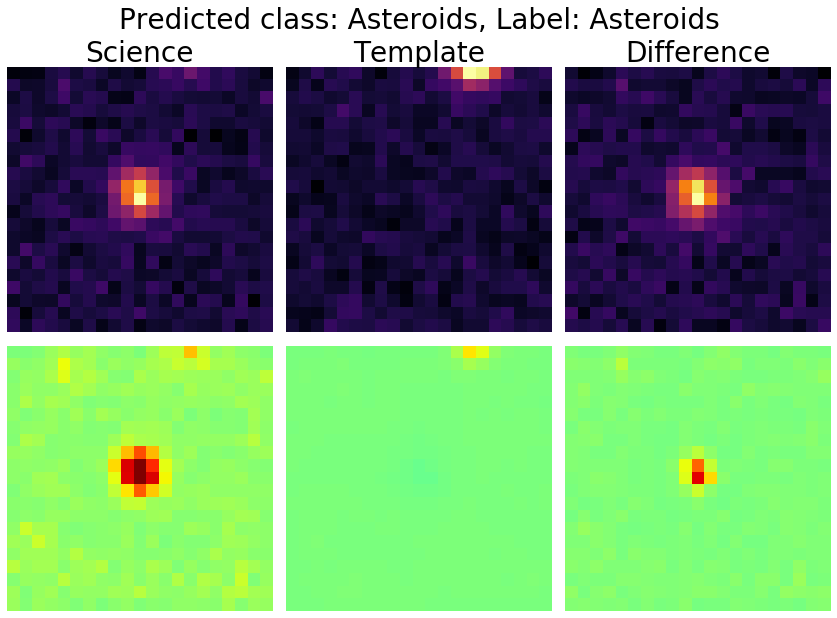

0.48708227 1.0


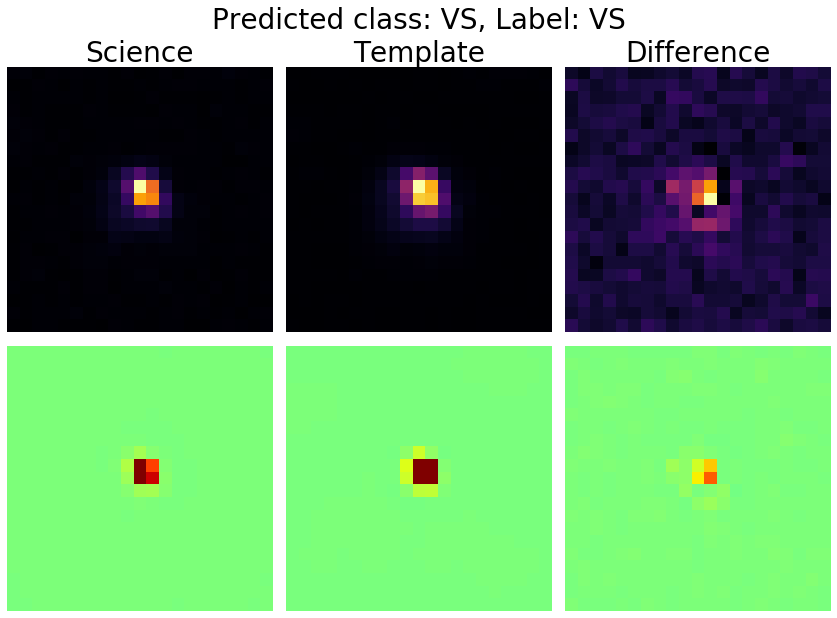

0.49465072 1.0


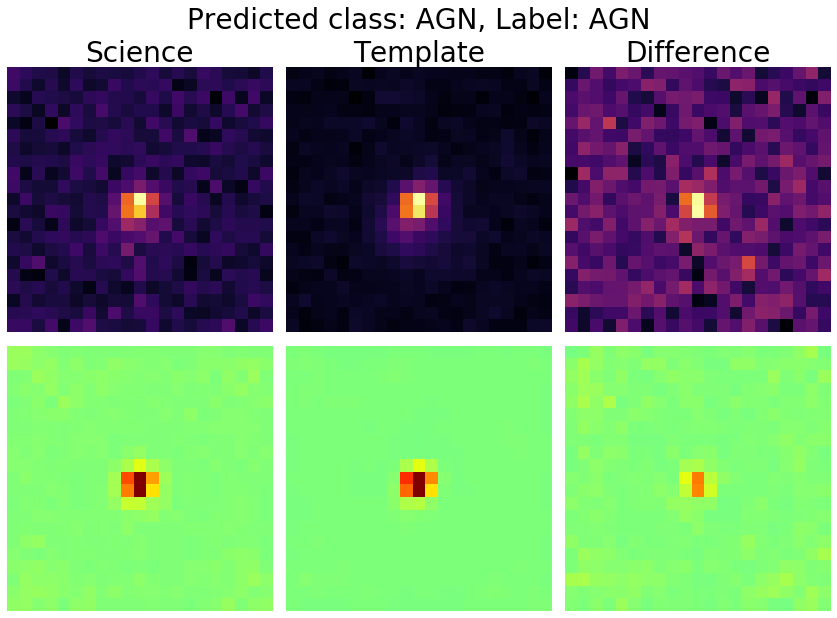

0.49588212 1.0


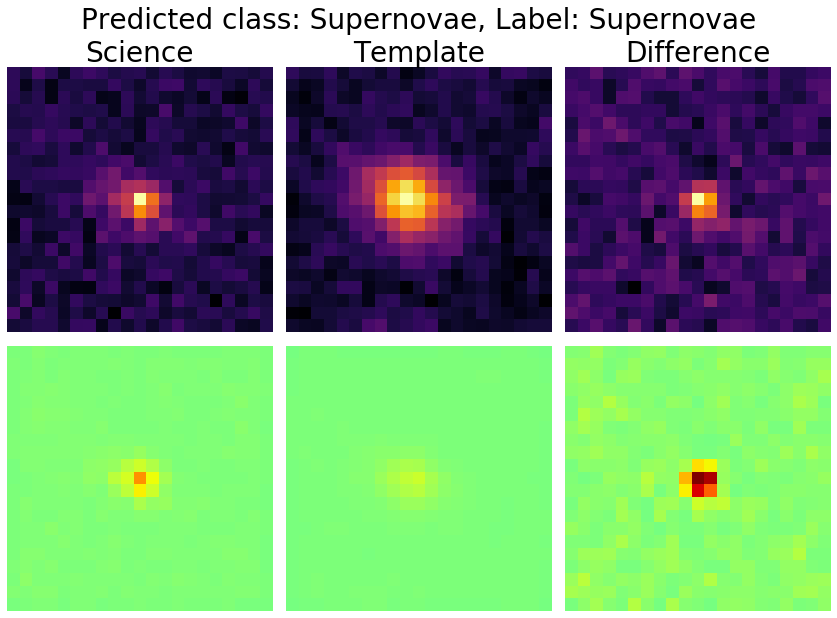

0.4955138 1.0


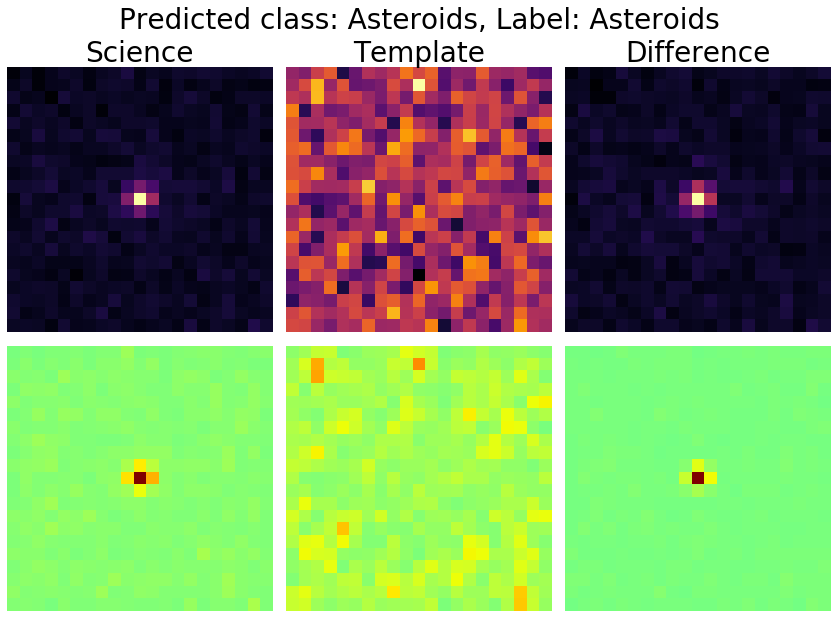

0.4930637 1.0


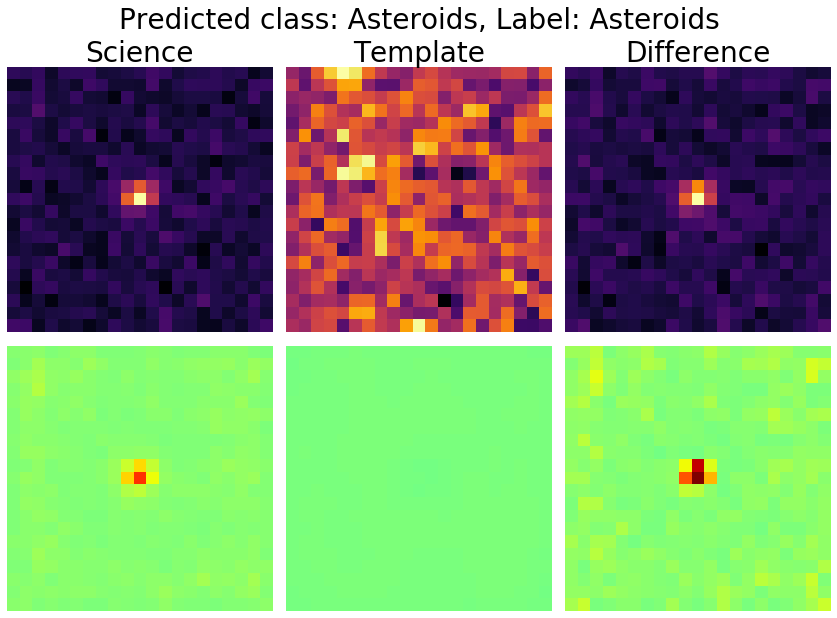

0.49318737 1.0


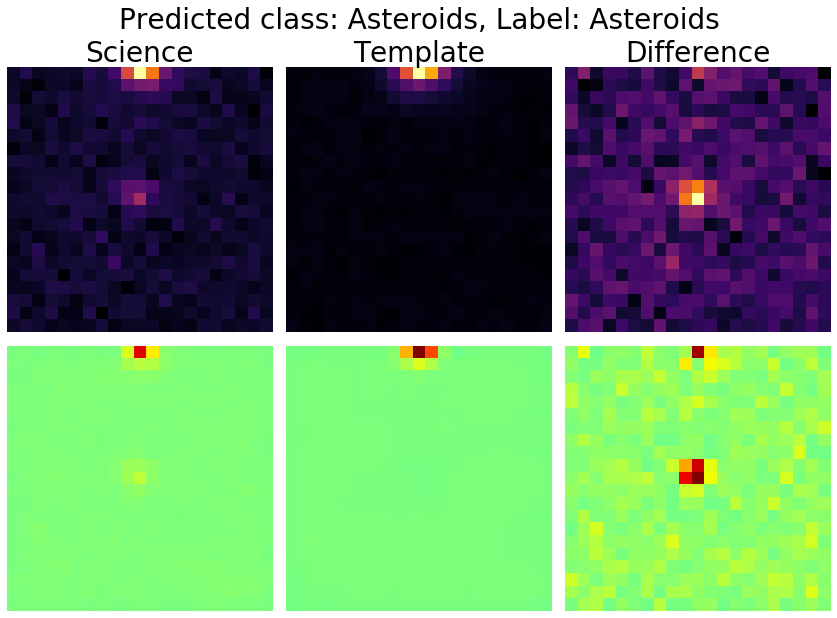

0.49069422 1.0


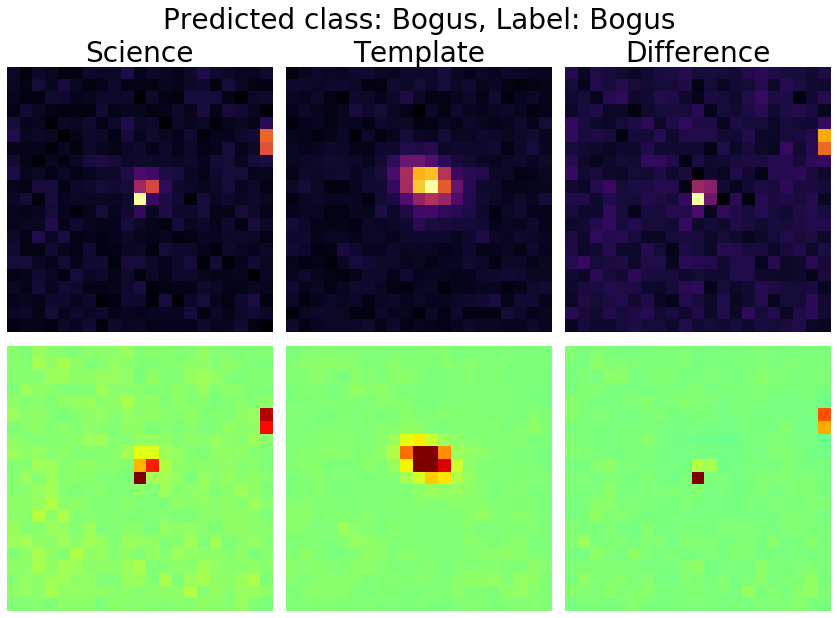

0.486339 1.0


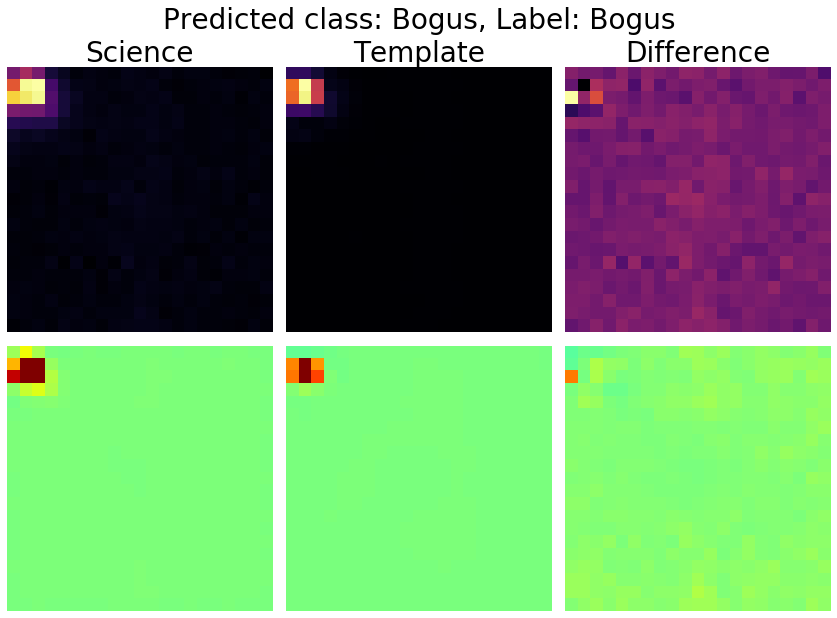

0.4749319 1.0


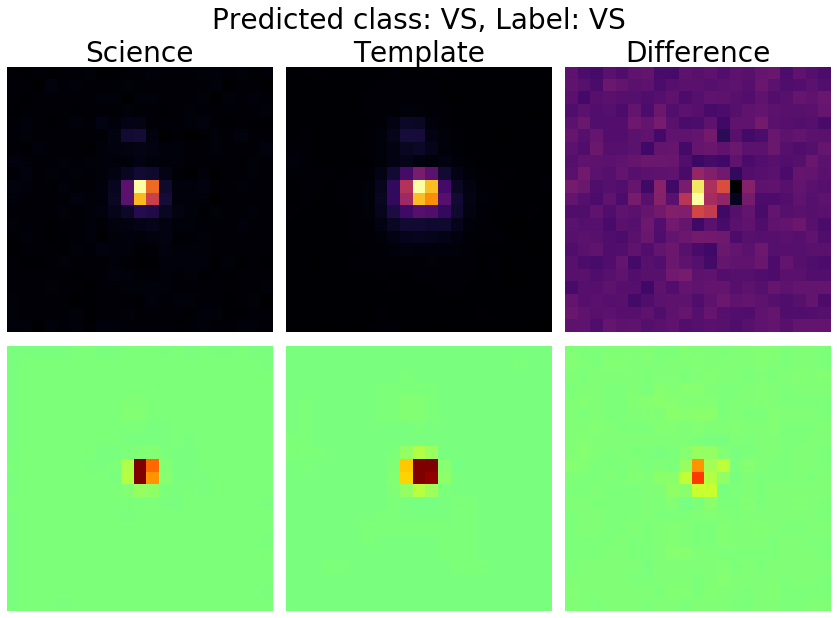

0.4960947 1.0


In [11]:
for i in range(25):
    pred_prob = correct_samples[i]["predicted"]
    label = correct_samples[i]["real_label"]
    images = correct_samples[i]["input_image"]
    relevances = correct_samples[i]["normalized_relevances"]
    plot_relevance(
        pred_prob,
        label,
        images,
        relevances,
        save_path="plots/lrp_plots/correct_sample_" + str(i) + ".png",
    )
    print(np.amin(relevances), np.amax(relevances))